<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Google Analytics - Get Stats per Country
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/template.ipynb" target="_parent">
<img src="https://img.shields.io/badge/-Open%20in%20Naas-success?labelColor=000000&logo="/>
</a>

**Tags:** #googleanalytics #statspercountry

Pre-requisite: Create your own <a href="">Google API JSON credential</a>

## Input

### Import library

In [1]:
import pycountry

import plotly.graph_objects as go
import plotly.express as px

from naas_drivers import googleanalytics

### Get your credential from Google Cloud Platform

In [2]:
json_path = '/Users/charlesdemontigny/Desktop/naas-335023-90c733ba64dd.json'

### Get view id from google analytics

In [3]:
view_id = "236707574"

## Model

### Report Website - Google Analytics performance

In [4]:
googleanalytics.connect(json_path=json_path)

### Visitor's country of origin

In [5]:
country = googleanalytics.views.get_data(
            view_id,
            metrics="ga:sessions",
            pivots_dimensions="ga:country",
            dimensions="ga:month",
            start_date=None,
            end_date=None,
            format_type="pivot",
        )

In [6]:
sessions_per_country = googleanalytics.views.get_country(view_id) # default: metrics="ga:sessions"

In [7]:
sessions_per_country

,Sessions
Canada,711.0
United States,235.0
France,68.0
China,27.0
Pakistan,17.0
United Kingdom,14.0
Germany,13.0
India,13.0
Philippines,11.0
Ukraine,10.0


In [8]:
users_per_country = googleanalytics.views.get_country(view_id, metrics="ga:users")  

## Output

### Display result

In [9]:
sessions_per_country.head()

,Sessions
Canada,711.0
United States,235.0
France,68.0
China,27.0
Pakistan,17.0


In [10]:
users_per_country.head()

,Users
Canada,552.0
United States,203.0
France,57.0
China,27.0
India,13.0


In [11]:
sessions_per_country = sessions_per_country.reset_index().rename(columns={"index": "Country"})
mapping = {country.name: country.alpha_3 for country in pycountry.countries}
sessions_per_country['iso_alpha'] = sessions_per_country['Country'].apply(lambda x: mapping.get(x))

In [12]:
sessions_per_country

,Country,Sessions,iso_alpha
0,Canada,711.0,CAN
1,United States,235.0,USA
2,France,68.0,FRA
3,China,27.0,CHN
4,Pakistan,17.0,PAK
5,United Kingdom,14.0,GBR
6,Germany,13.0,DEU
7,India,13.0,IND
8,Philippines,11.0,PHL
9,Ukraine,10.0,UKR


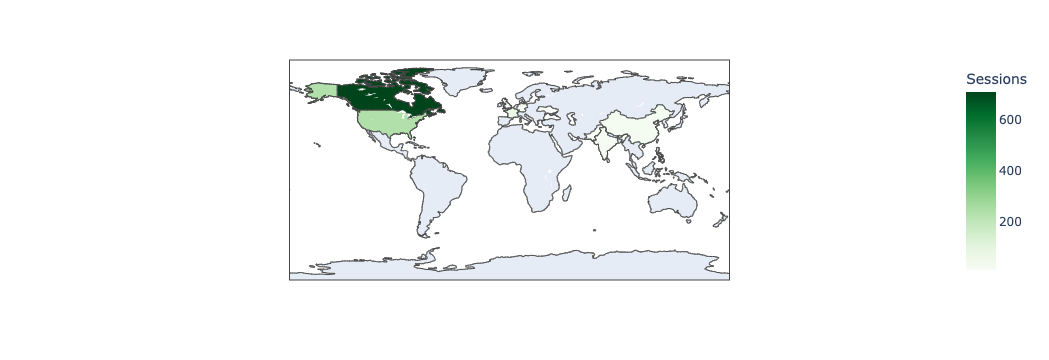

In [16]:
fig = px.choropleth(sessions_per_country, locations="iso_alpha",
                    color="Sessions", 
                    hover_name="Country",
                    color_continuous_scale="Greens")
fig.show()